In [2]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [3]:
df = pd.read_csv("bismillah.csv")

## One-Hot Encoder

In [4]:
from sklearn.preprocessing import OneHotEncoder

df = pd.concat([df, pd.get_dummies(df['kota'], prefix='kota')], axis=1)
df = pd.concat([df, pd.get_dummies(df['kecamatan'], prefix='kecamatan')], axis=1)
df.drop(['kota', 'kecamatan'], axis=1, inplace=True)
df.head()

,kamar_tidur,kamar_mandi,luas,harga,kota_Banjar,kota_Banjarbaru,kota_Banjarmasin,kota_Barito,kota_Kalimantan,kecamatan_Alalak,...,kecamatan_Banjarmasin Tengah,kecamatan_Banjarmasin Timur,kecamatan_Banjarmasin Utara,kecamatan_Gambut,kecamatan_Kertak Hanyar,kecamatan_Landasan Ulin,kecamatan_Liang Anggang,kecamatan_Martapura Kota,kecamatan_Sei/Sungai Tabuk,kecamatan_Tatah Makmur
0,2,2,70,400000000,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,2,1,60,400000000,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,2,1,120,550000000,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,3,2,100,555000000,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,2,1,45,400000000,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False


## Split Train Test

In [5]:
X = df.drop(columns=['harga'])
y = df['harga']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, 
                                                    random_state = 137)

## Standard Scaler

In [7]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['kamar_mandi', 'kamar_tidur', 'luas']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])

## GridSearchCV

In [8]:
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

In [9]:
GBR=GradientBoostingRegressor()
search_grid={'n_estimators':[500, 1000, 2000], 
             'min_samples_split':[5, 10, 15],
             'min_samples_leaf':[5, 10, 15], 
             'max_depth':[8, 16, 24]}
search=GridSearchCV(estimator=GBR, 
                    param_grid=search_grid,
                    scoring='neg_mean_squared_error', 
                    n_jobs=-1,
                    verbose=3,
                    cv=crossvalidation)

In [10]:
search.fit(X_train, y_train)
print(search.best_params_)
print(search.best_score_)

Fitting 10 folds for each of 81 candidates, totalling 810 fits
{'max_depth': 8, 'min_samples_leaf': 15, 'min_samples_split': 10, 'n_estimators': 500}
-8.701419679782397e+16


## Model Developmet

In [11]:
GBR_new = GradientBoostingRegressor(max_depth=8, 
                                    min_samples_leaf=15, 
                                    min_samples_split=5, 
                                    n_estimators=500)

model = GBR_new.fit(X_train, y_train)

In [12]:
y_pred = GBR_new.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_pred, y_test)
print(f"RMSE:{rmse} and MSE:{mse}")

RMSE:602190108.4174551 and MSE:3.6263292667582637e+17


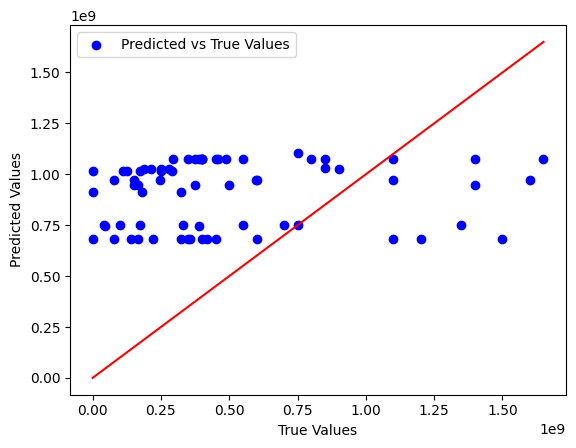

In [13]:
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs True Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line for reference
plt.show()